In [93]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# time data manipulation
from datetime import datetime, timedelta

# pipeline construction
from sklearn.pipeline import Pipeline

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# data processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# measuring execution time
import time

# remove annoying warnings
import warnings
warnings.filterwarnings('ignore')

# <<<<<<<<<<<<<<< Credit Card Fraud Detection >>>>>>>>>>>>>>>
by: Eryk Langa

# Dataset: downloading and description

Dataset has been downloaded from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [2]:
raw_df = pd.read_csv('creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
raw_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Description:

"The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."

(source: "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data")

# Goals:
- make the best effort to understand the data despite confidentiality issues and PCA transformation,
- perform some Feature engineering,
- pick the best features to fit the classifiers,
- train the models based on raw, oversampled and undersampled data,
- evaluate the models and pick the best one(s),
- search for the best parameters for those best classifier(s).

# Basic Exploratory Data Analysis

In [4]:
raw_df.shape

(284807, 31)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
raw_df.isnull().sum().any()

False

In [7]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
raw_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
raw_df['Class'].value_counts() / raw_df.shape[0] * 100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

In [10]:
fraud_percentage = round(raw_df["Class"].value_counts() / raw_df.shape[0] * 100, 4)[1]

print(f'Only {fraud_percentage}% of the total {raw_df.shape[0]} transactions are frauds.')

Only 0.1727% of the total 284807 transactions are frauds.


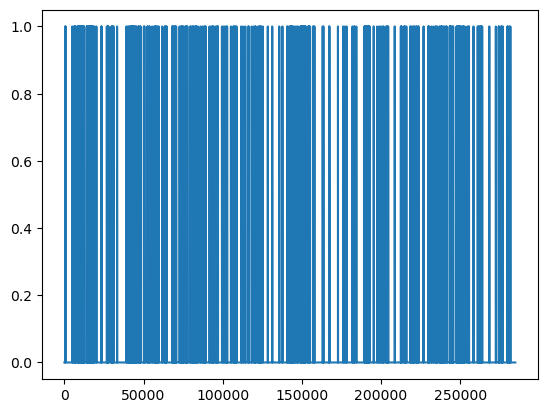

In [11]:
plt.plot(raw_df['Class'])
plt.show()

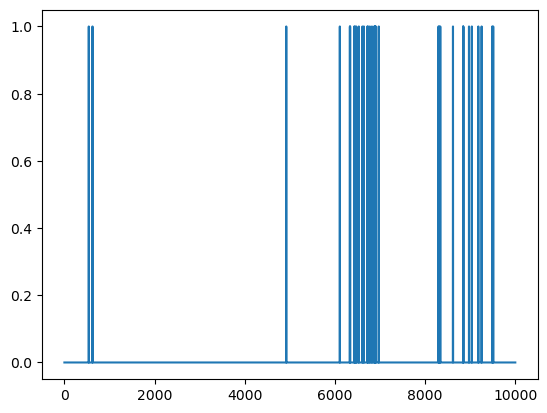

In [12]:
plt.plot(raw_df['Class'].head(10000))
plt.show()

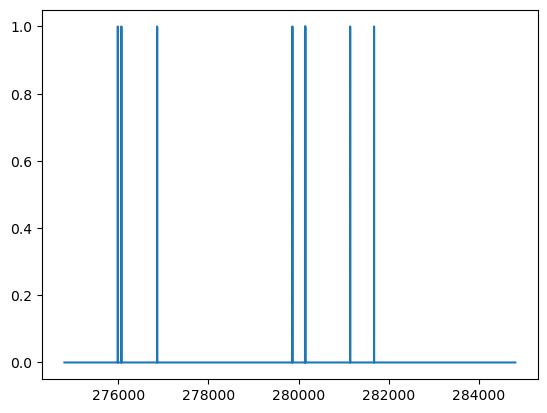

In [13]:
plt.plot(raw_df['Class'].tail(10000))
plt.show()

### It looks like frauds often occur in groups, but at the moment, it's difficult to pinpoint why. This may be clarified in further stages of data analysis.

### Let's check if there really are 2 days.

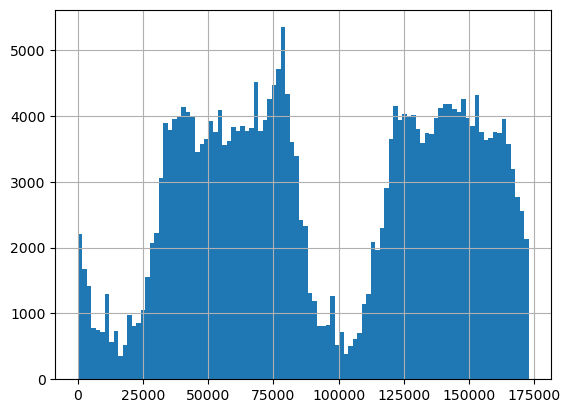

In [14]:
raw_df['Time'].hist(bins=100)
plt.show()

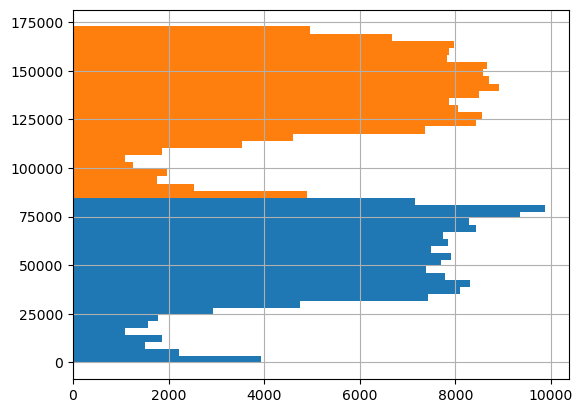

In [15]:
raw_df['Time'].loc[:len(raw_df)/2].hist(bins=24, orientation='horizontal')
raw_df['Time'].loc[len(raw_df)/2:].hist(bins=24, orientation='horizontal')
plt.show()

In [16]:
seconds_in_2_days = 60*60*24*2
seconds_in_raw_df = raw_df['Time'].tail(1)
diff_in_secs = int((seconds_in_2_days - seconds_in_raw_df).iloc[0])

print(f'Dataset lacks {diff_in_secs} seconds of two days.')

Dataset lacks 8 seconds of two days.


In [17]:
diff_sec_perc = diff_in_secs / seconds_in_2_days * 100
print(f'And those {diff_in_secs} seconds are {round(diff_sec_perc, 4)}% of the total database.')

And those 8 seconds are 0.0046% of the total database.


### The amount of data and its distribution confirm that the dataset spans over 2 days.

In [18]:
print(f'Total length: {len(raw_df)}')
print()

for column in raw_df:
    print(f'{column}')
    print(f'   Number of unique values: {len(raw_df[column].unique())}')
    if len(raw_df[column].unique()) == len(raw_df[raw_df.columns[raw_df.columns.get_loc(column)-1]].unique()):
        print("   Same amount as before.")
    print()

Total length: 284807

Time
   Number of unique values: 124592

V1
   Number of unique values: 275663

V2
   Number of unique values: 275663
   Same amount as before.

V3
   Number of unique values: 275663
   Same amount as before.

V4
   Number of unique values: 275663
   Same amount as before.

V5
   Number of unique values: 275663
   Same amount as before.

V6
   Number of unique values: 275663
   Same amount as before.

V7
   Number of unique values: 275663
   Same amount as before.

V8
   Number of unique values: 275663
   Same amount as before.

V9
   Number of unique values: 275663
   Same amount as before.

V10
   Number of unique values: 275663
   Same amount as before.

V11
   Number of unique values: 275663
   Same amount as before.

V12
   Number of unique values: 275663
   Same amount as before.

V13
   Number of unique values: 275663
   Same amount as before.

V14
   Number of unique values: 275663
   Same amount as before.

V15
   Number of unique values: 275663
   Same a

Column: V1
Unique values: 275663


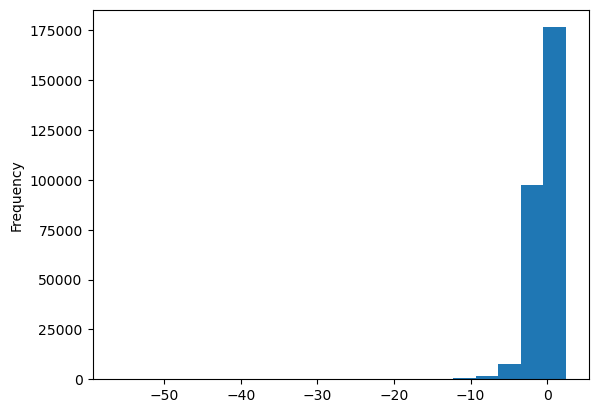

Column: V2
Unique values: 275663


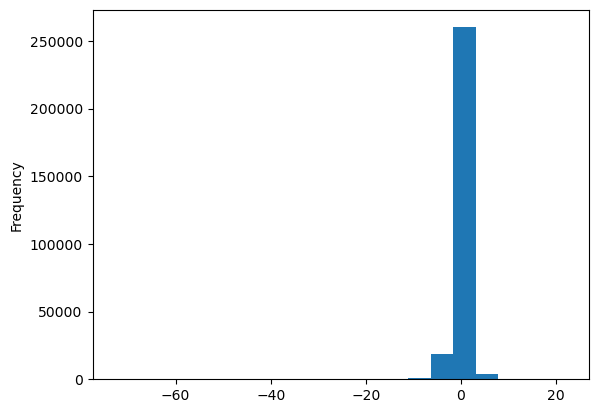

Column: V3
Unique values: 275663


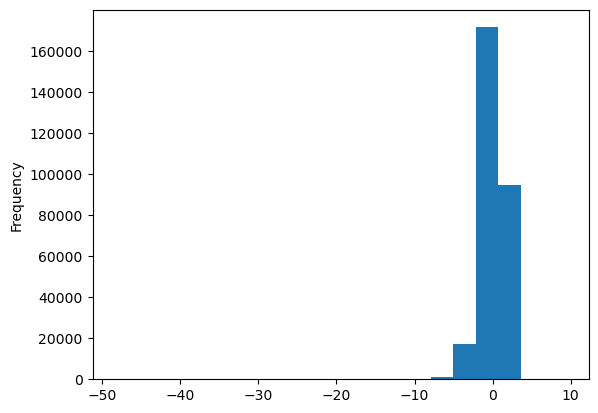

Column: V4
Unique values: 275663


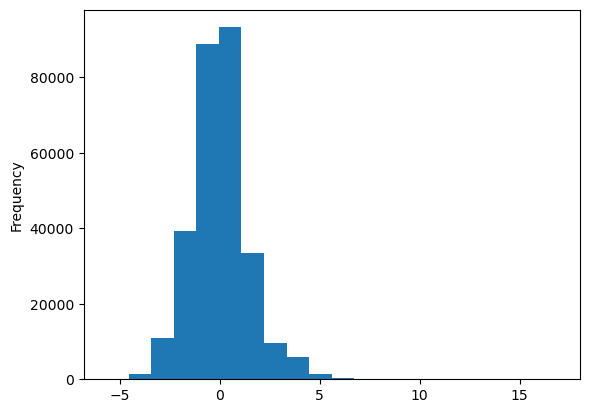

Column: V5
Unique values: 275663


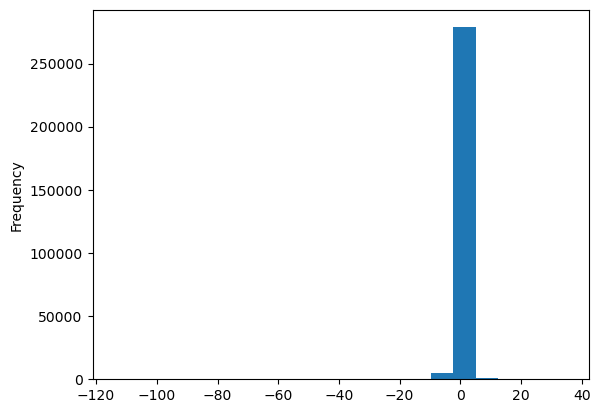

Column: V6
Unique values: 275663


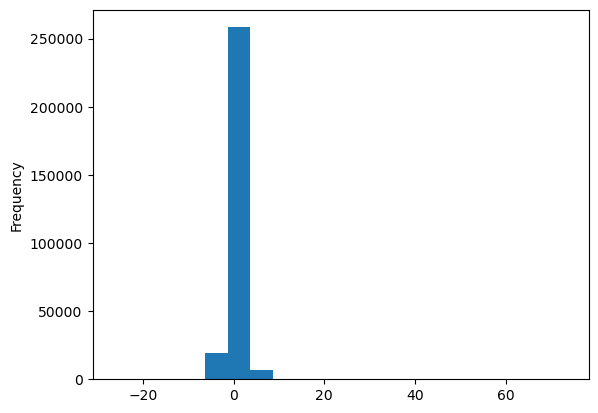

Column: V7
Unique values: 275663


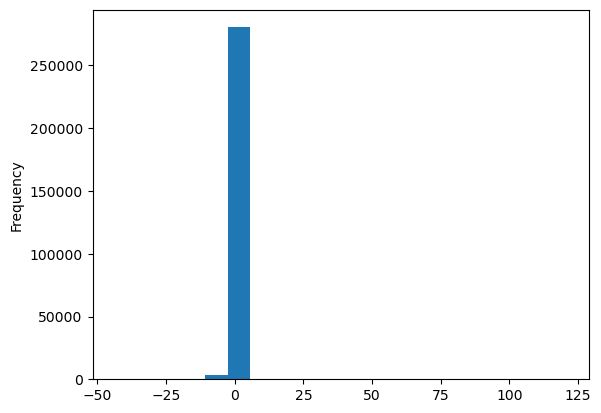

Column: V8
Unique values: 275663


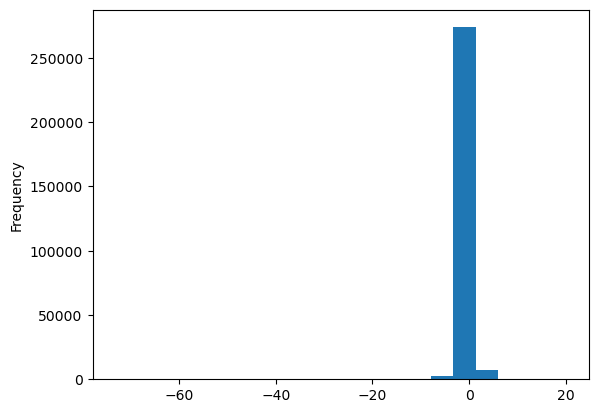

Column: V9
Unique values: 275663


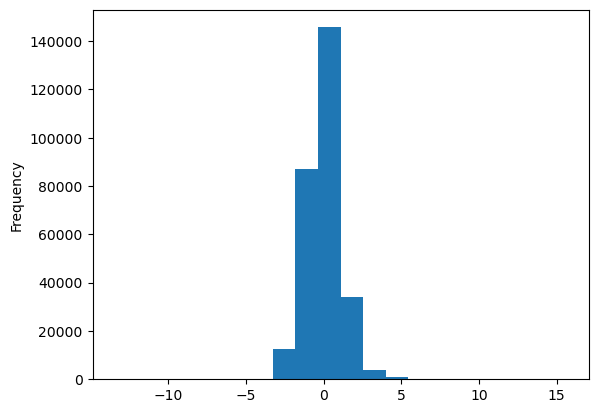

Column: V10
Unique values: 275663


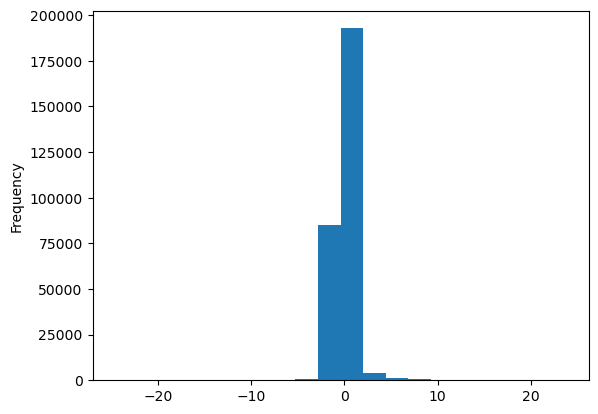

Column: V11
Unique values: 275663


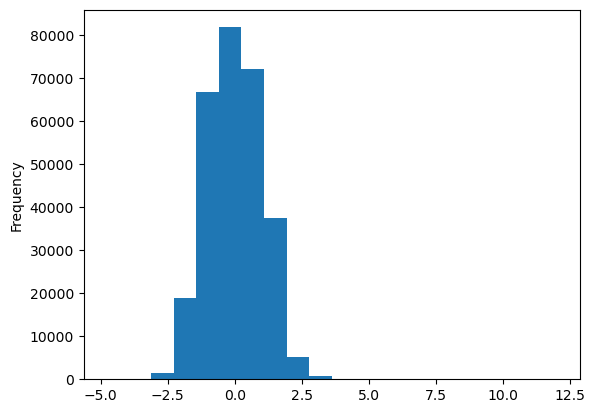

Column: V12
Unique values: 275663


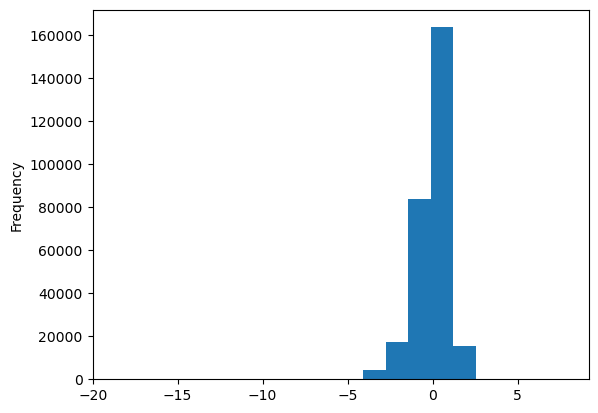

Column: V13
Unique values: 275663


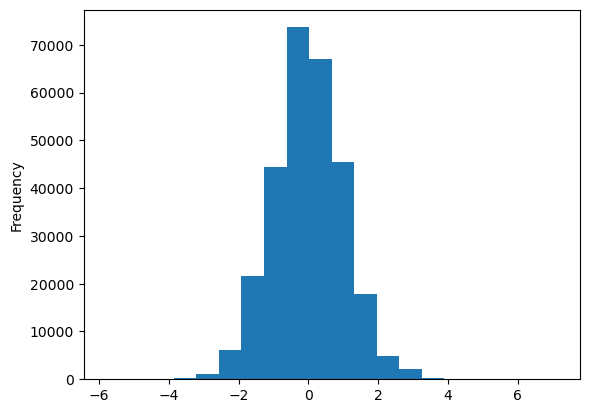

Column: V14
Unique values: 275663


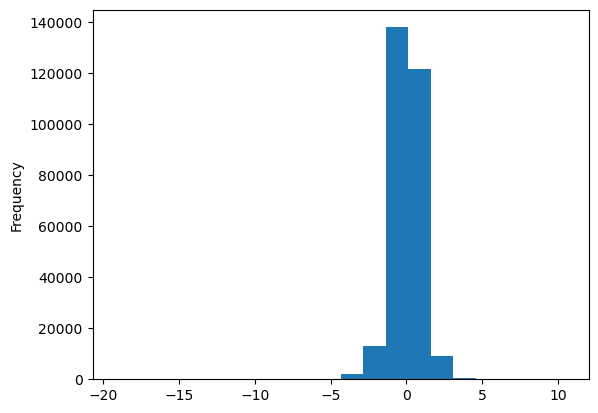

Column: V15
Unique values: 275663


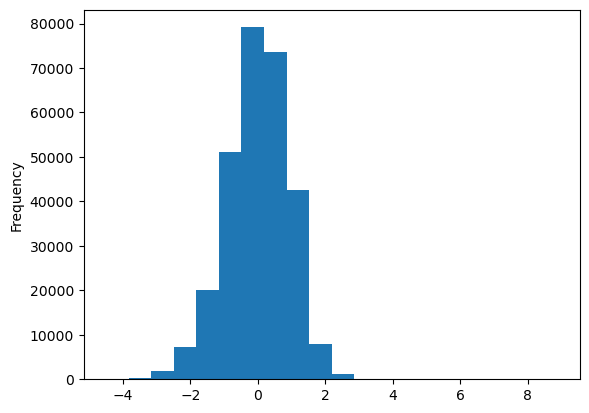

Column: V16
Unique values: 275663


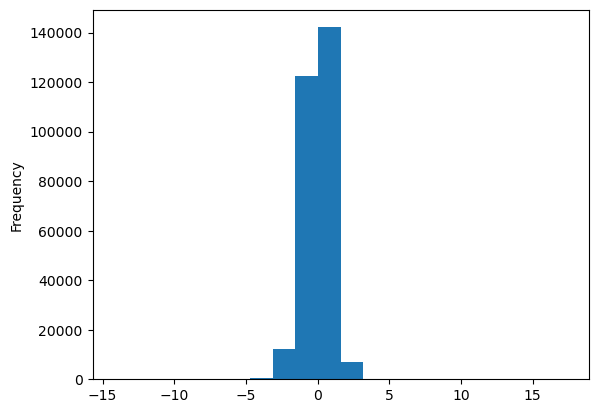

Column: V17
Unique values: 275663


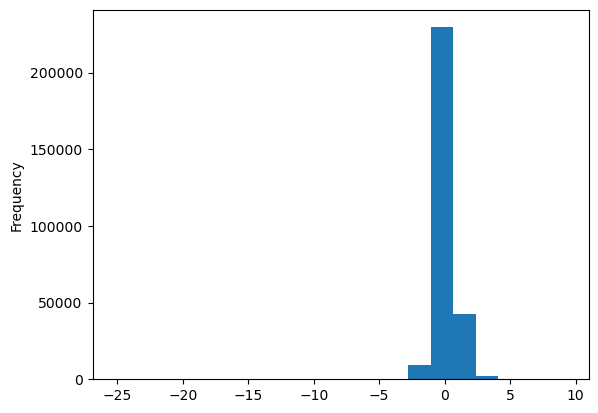

Column: V18
Unique values: 275663


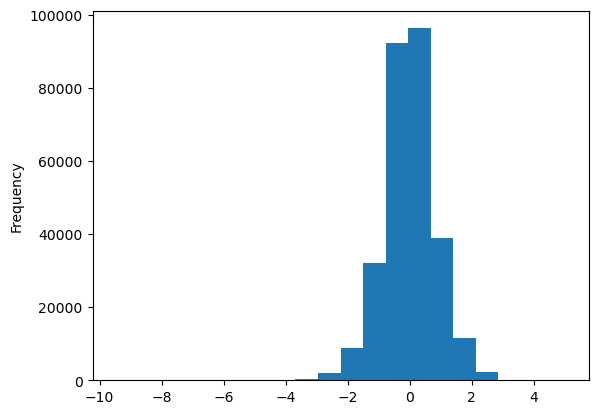

Column: V19
Unique values: 275663


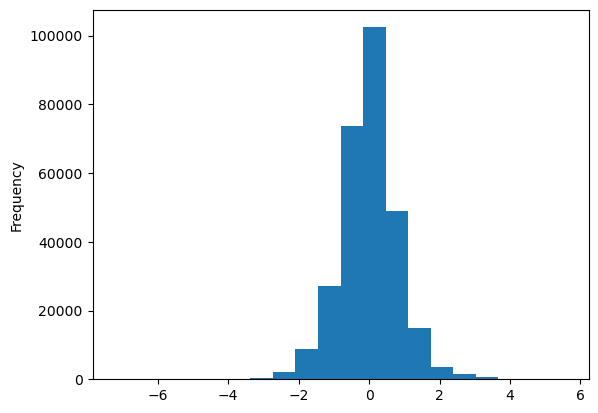

Column: V20
Unique values: 275663


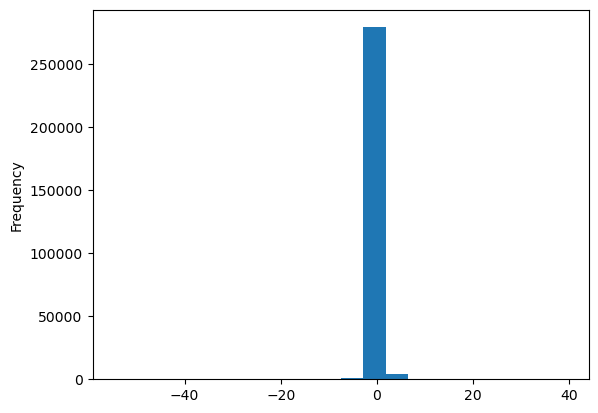

Column: V21
Unique values: 275663


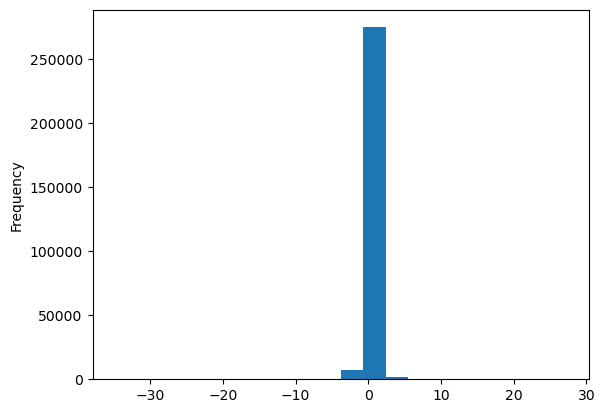

Column: V22
Unique values: 275663


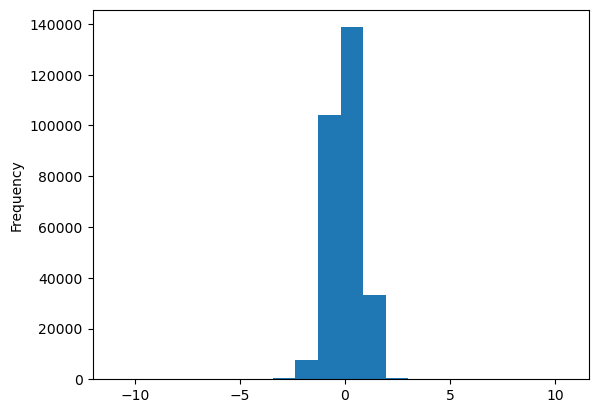

Column: V23
Unique values: 275663


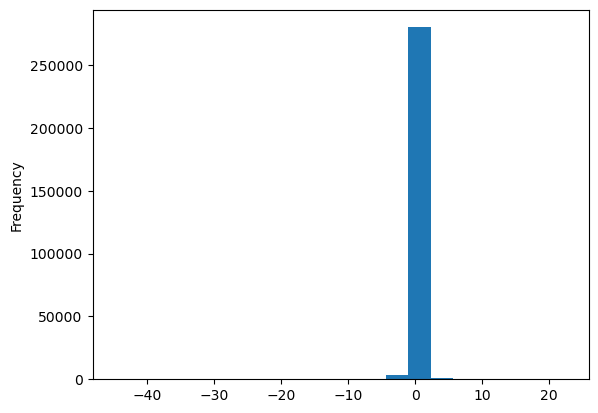

Column: V24
Unique values: 275663


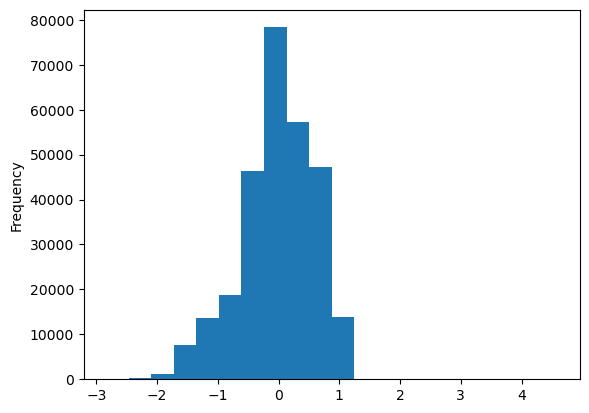

Column: V25
Unique values: 275663


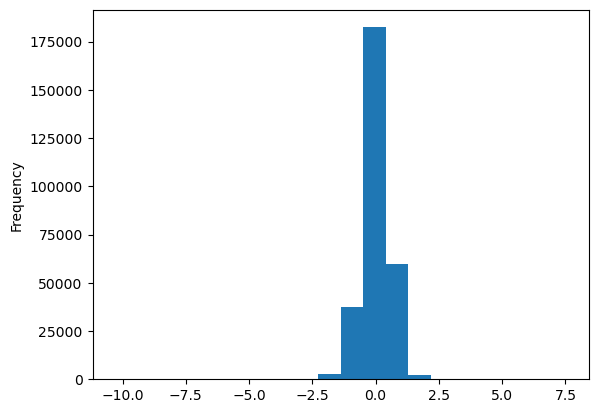

Column: V26
Unique values: 275663


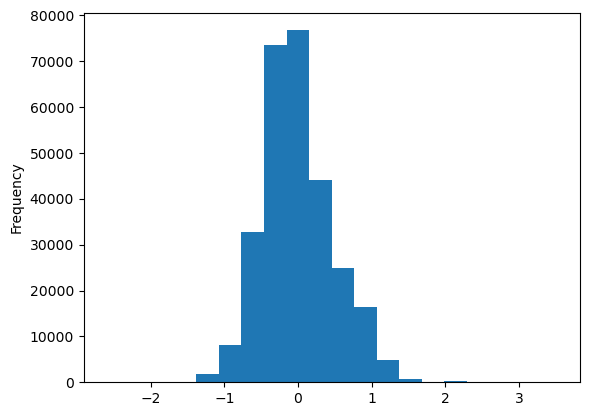

Column: V27
Unique values: 275663


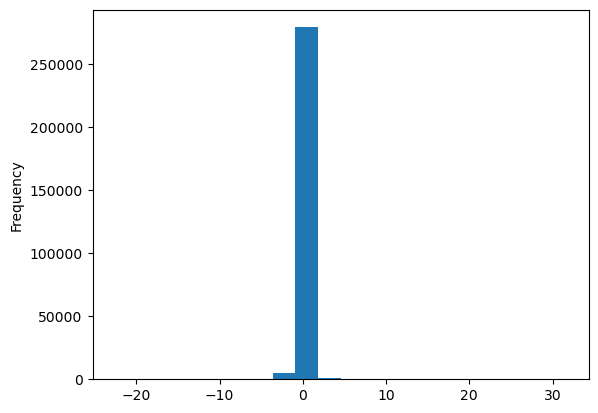

Column: V28
Unique values: 275663


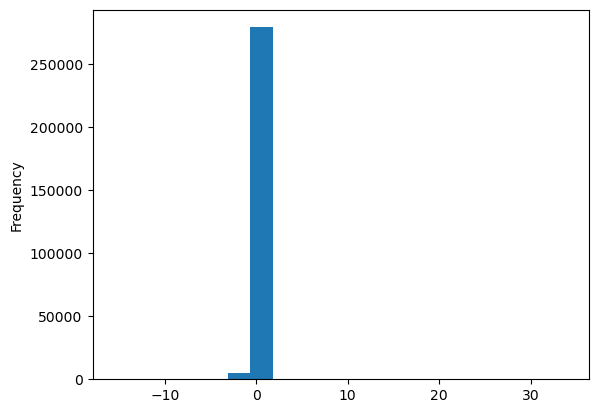

Column: Amount
Unique values: 32767


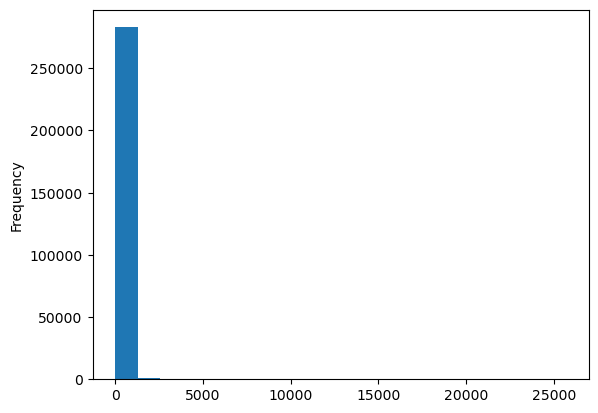

Column: Class
Unique values: 2


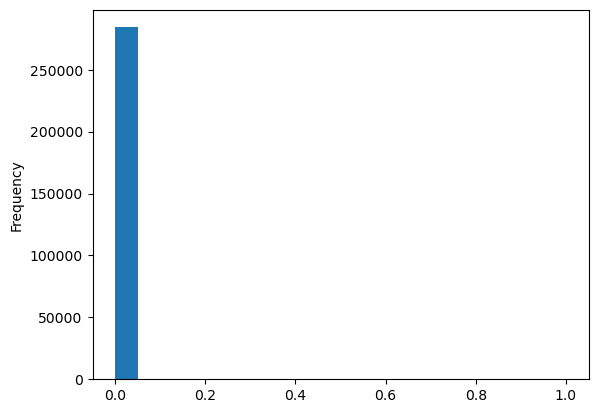

In [19]:
for column in raw_df.columns[1:]:
    print(f'Column: {column}')
    print(f'Unique values: {len(raw_df[column].unique())}')
    raw_df[column].plot.hist(bins=20)
    plt.show()

### Histograms illustrate how different values are distributed within individual columns.

In [20]:
raw_df['Amount'].describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

In [21]:
raw_df[['Amount','Class']].head()

,Amount,Class
0,149.62,0
1,2.69,0
2,378.66,0
3,123.50,0
4,69.99,0


In [22]:
raw_df.groupby('Amount').agg({'Class': 'sum'}).sort_values('Class', ascending=False).head(20)

,Class
Amount,
1.00,113
0.00,27
99.99,27
0.76,17
0.77,10
0.01,5
3.79,4
2.00,4
2.28,3


In [23]:
raw_df.groupby('Amount').agg({'Class': 'sum'}).sort_values('Class', ascending=False).shape

(32767, 1)

In [24]:
Amount_Class_corr_df = raw_df.groupby('Amount').agg({'Class': 'sum'}).sort_values('Class', ascending=False).reset_index()
Amount_Class_corr_df

,Amount,Class
0,1.00,113
1,0.00,27
2,99.99,27
3,0.76,17
4,0.77,10
...,...,...
32762,116.72,0
32763,116.71,0
32764,116.70,0
32765,116.69,0


In [25]:
Amount_Class_corr_df = Amount_Class_corr_df.loc[Amount_Class_corr_df["Class"] > 0]
Amount_Class_corr_df

,Amount,Class
0,1.00,113
1,0.00,27
2,99.99,27
3,0.76,17
4,0.77,10
...,...,...
254,11.40,1
255,30.26,1
256,261.22,1
257,11.39,1


In [26]:
Amount_Class_corr_df.describe().round(2)

,Amount,Class
count,259.00,259.00
mean,210.22,1.90
std,323.09,7.39
min,0.00,1.00
25%,11.39,1.00
50%,88.00,1.00
75%,271.50,1.00
max,2125.87,113.00


In [27]:
raw_df[["Amount"]].describe().round(2)

,Amount
count,284807.00
mean,88.35
std,250.12
min,0.00
25%,5.60
50%,22.00
75%,77.16
max,25691.16


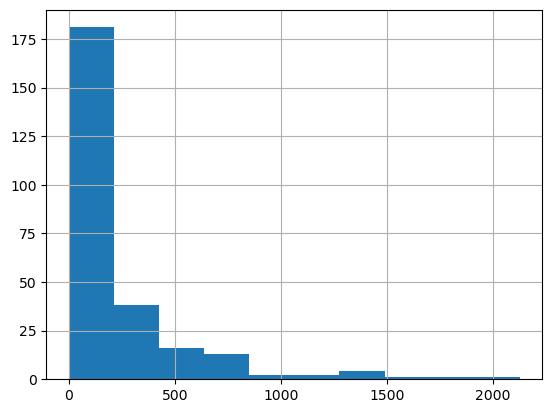

In [28]:
Amount_Class_corr_df["Amount"].hist()
plt.show()

In [29]:
Amount_Class_corr_df.sort_values('Amount', ascending=False).head(10)

,Amount,Class
157,2125.87,1
74,1809.68,1
246,1504.93,1
61,1402.16,1
181,1389.56,1
128,1354.25,1
152,1335.00,1
42,1218.89,1
239,1096.99,1
131,996.27,1


### So the higher the amount, the less fraud.

<Axes: >

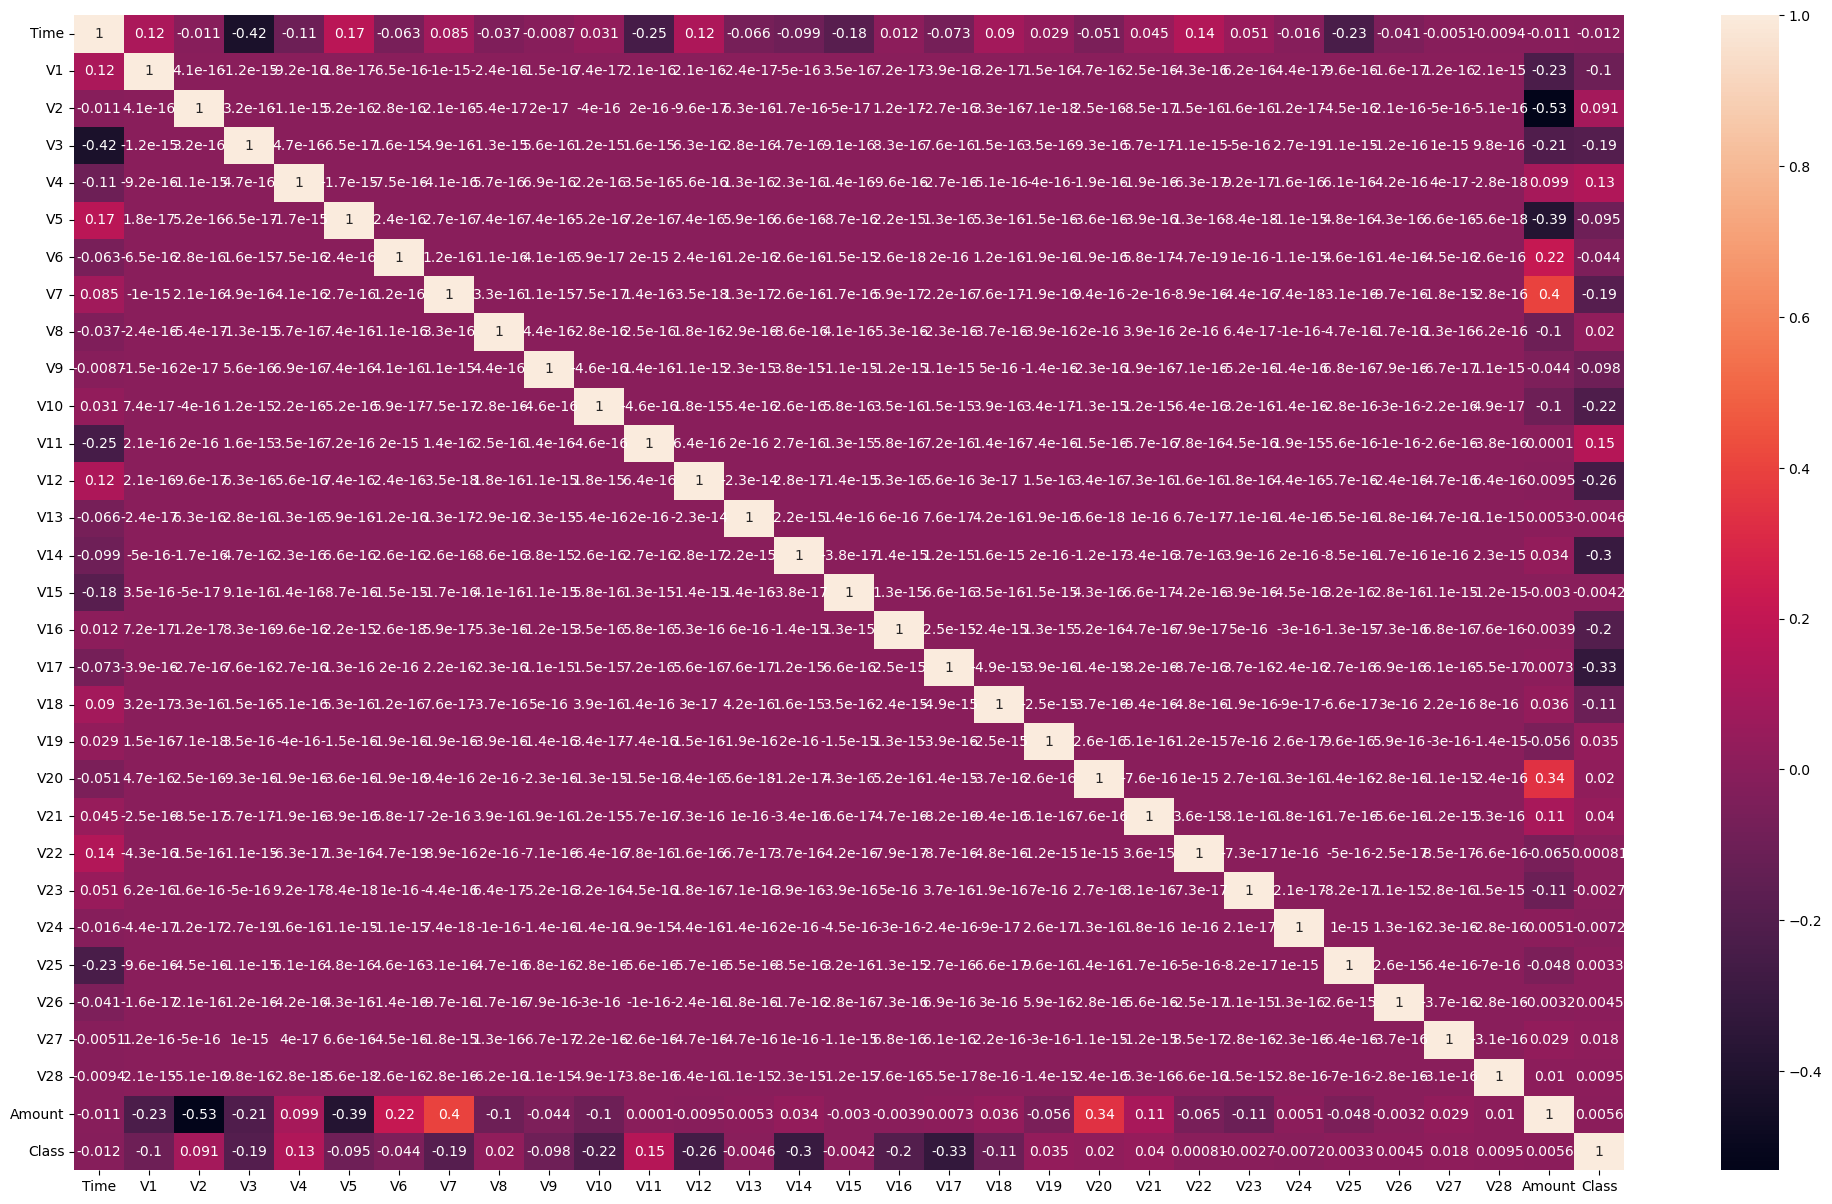

In [30]:
plt.figure(figsize=(25,15))
sns.heatmap(raw_df.corr(), annot=True)

## Conclusions:
1. "Time", "Amount" and "Class" are the only columns that are meaningful.
2. "Class" is highly imbalanced. Only 0.17% of the transactions are frauds. Even based on 284 807 records, models will be trained and tested on only 492 frauds.
3. There is no way to find out what features from "V1" to "V28" stands for due to "confidentiality issues" and PCA transformation. There is no way to check if those features are redundant based only on their name and quick data analysis.
4. Some of the features from "V1" to "V28" correlate with "Time" and/or "Amount".
5. The amount of unique records is the same in all of those features (from "V1" to "V28"): 275 663, so there might be 275 663 credit cards or bank clients.

# Splitting the dataset into training and testing sets
### (To improve the accuracy metrics of future models, it is important to shuffle the dataset first)

In [31]:
raw_df = raw_df.sample(frac=1, random_state=123).reset_index(drop=True)
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,54992.0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,...,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,50.00,0
1,145983.0,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,...,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,58.00,0
2,142073.0,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,...,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,198.00,0
3,132462.0,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,...,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,82.00,0
4,119001.0,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,...,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,93.75,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(raw_df.drop('Class', axis=1), 
                                                    raw_df['Class'], 
                                                    test_size=0.2,
                                                    stratify=raw_df['Class'],
                                                    random_state=123)

In [33]:
y_train.value_counts(), y_test.value_counts()

(Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [34]:
y_train.value_counts() / y_train.shape[0] * 100, y_test.value_counts() / y_test.shape[0] * 100

(Class
 0    99.827075
 1     0.172925
 Name: count, dtype: float64,
 Class
 0    99.827955
 1     0.172045
 Name: count, dtype: float64)

# Feature engineering based on "Time" and handling outliers in "Amount"

### The dataset description indicates that the time represents two days in September 2013, and this has been confirmed.

### Let's say those two days were in the middle of the week: 4-5 September. This will help with Features Engineering but it has to be dropped before training the models.

In [35]:
X_train['Time_passed'] = X_train['Time']
X_train['Time'] = X_train['Time'].apply(lambda x: datetime(2013, 9, 4) + timedelta(seconds = x))

X_train.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_passed
136371,2013-09-04 17:20:39,1.147453,0.169921,0.107944,0.428241,-0.081716,-0.575489,0.252880,-0.040075,-0.427275,...,-0.283132,-0.908691,0.176528,0.218084,0.140476,0.136562,-0.056231,0.000672,24.95,62439.0
214650,2013-09-04 02:55:43,0.905219,-0.628453,0.425105,0.263475,-0.083835,1.322819,-0.587172,0.428696,2.214416,...,-0.105864,0.083784,0.015049,-0.955102,0.033911,1.196675,-0.046577,-0.008357,95.00,10543.0
274157,2013-09-04 21:41:47,-0.952457,1.484818,1.480450,0.089976,0.381702,-0.783340,1.400403,-1.109357,0.881542,...,-0.389088,-0.444680,-0.031263,0.319219,-0.740249,-0.062691,-0.759987,-0.519772,5.25,78107.0
101787,2013-09-05 08:23:23,-6.168734,5.308461,-4.764475,-0.734801,-3.494095,-1.846573,-2.758955,4.373177,0.350296,...,-0.186237,-0.926991,0.664431,-0.004435,0.296408,0.181063,-0.129455,-0.161479,15.98,116603.0
58997,2013-09-05 15:34:43,-0.942352,1.075937,0.644943,-0.729171,1.409192,-0.679065,1.137491,-0.180963,-0.684114,...,-0.336142,-1.024539,-0.235740,0.508432,0.591027,0.283498,-0.178241,0.104075,1.98,142483.0


In [36]:
X_train['0-3am'] = X_train['Time'].apply(lambda x: 1 if x.hour < 3 else 0)
X_train['3-6am'] = X_train['Time'].apply(lambda x: 1 if x.hour >= 3 and x.hour < 6 else 0)
X_train['6-9am'] = X_train['Time'].apply(lambda x: 1 if x.hour >= 6 and x.hour < 9 else 0)
X_train['9-12am'] = X_train['Time'].apply(lambda x: 1 if x.hour >= 9 and x.hour < 12 else 0)
X_train['12am-3pm'] = X_train['Time'].apply(lambda x: 1 if x.hour >= 12 and x.hour < 15 else 0)
X_train['3-6pm'] = X_train['Time'].apply(lambda x: 1 if x.hour >= 15 and x.hour < 18 else 0)
X_train['6-9pm'] = X_train['Time'].apply(lambda x: 1 if x.hour >= 18 and x.hour < 21 else 0)
X_train['9-12pm'] = X_train['Time'].apply(lambda x: 1 if x.hour >= 21 and x.hour < 24 else 0)

X_train.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Time_passed,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm
136371,2013-09-04 17:20:39,1.147453,0.169921,0.107944,0.428241,-0.081716,-0.575489,0.252880,-0.040075,-0.427275,...,24.95,62439.0,0,0,0,0,0,1,0,0
214650,2013-09-04 02:55:43,0.905219,-0.628453,0.425105,0.263475,-0.083835,1.322819,-0.587172,0.428696,2.214416,...,95.00,10543.0,1,0,0,0,0,0,0,0
274157,2013-09-04 21:41:47,-0.952457,1.484818,1.480450,0.089976,0.381702,-0.783340,1.400403,-1.109357,0.881542,...,5.25,78107.0,0,0,0,0,0,0,0,1
101787,2013-09-05 08:23:23,-6.168734,5.308461,-4.764475,-0.734801,-3.494095,-1.846573,-2.758955,4.373177,0.350296,...,15.98,116603.0,0,0,1,0,0,0,0,0
58997,2013-09-05 15:34:43,-0.942352,1.075937,0.644943,-0.729171,1.409192,-0.679065,1.137491,-0.180963,-0.684114,...,1.98,142483.0,0,0,0,0,0,1,0,0


<Axes: ylabel='Frequency'>

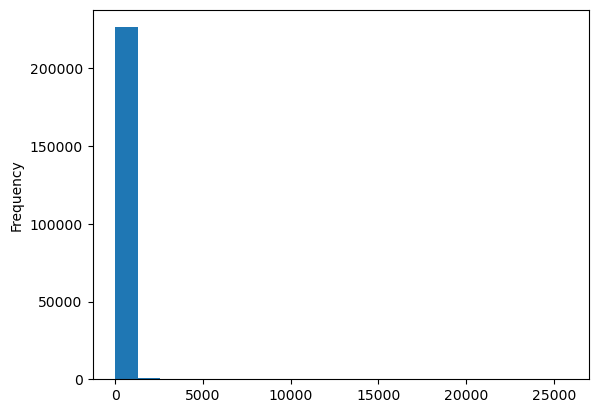

In [37]:
X_train["Amount"].plot.hist(bins=20)

In [38]:
round(np.percentile(X_train["Amount"], 99))

1015

In [39]:
Amount_outliers = np.percentile(X_train["Amount"], 99)

X_train['Amount_no_outliers'] = X_train['Amount'].apply(lambda x: Amount_outliers
                                                        if x > Amount_outliers
                                                        else x)

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Time_passed,0-3am,3-6am,6-9am,9-12am,12am-3pm,3-6pm,6-9pm,9-12pm,Amount_no_outliers
136371,2013-09-04 17:20:39,1.147453,0.169921,0.107944,0.428241,-0.081716,-0.575489,0.252880,-0.040075,-0.427275,...,62439.0,0,0,0,0,0,1,0,0,24.95
214650,2013-09-04 02:55:43,0.905219,-0.628453,0.425105,0.263475,-0.083835,1.322819,-0.587172,0.428696,2.214416,...,10543.0,1,0,0,0,0,0,0,0,95.00
274157,2013-09-04 21:41:47,-0.952457,1.484818,1.480450,0.089976,0.381702,-0.783340,1.400403,-1.109357,0.881542,...,78107.0,0,0,0,0,0,0,0,1,5.25
101787,2013-09-05 08:23:23,-6.168734,5.308461,-4.764475,-0.734801,-3.494095,-1.846573,-2.758955,4.373177,0.350296,...,116603.0,0,0,1,0,0,0,0,0,15.98
58997,2013-09-05 15:34:43,-0.942352,1.075937,0.644943,-0.729171,1.409192,-0.679065,1.137491,-0.180963,-0.684114,...,142483.0,0,0,0,0,0,1,0,0,1.98


In [40]:
X_train[["Amount", "Amount_no_outliers"]]

,Amount,Amount_no_outliers
136371,24.95,24.95
214650,95.00,95.00
274157,5.25,5.25
101787,15.98,15.98
58997,1.98,1.98
...,...,...
57304,0.89,0.89
221829,394.99,394.99
235965,143.98,143.98
129057,30.00,30.00


array([[<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Amount_no_outliers'}>]], dtype=object)

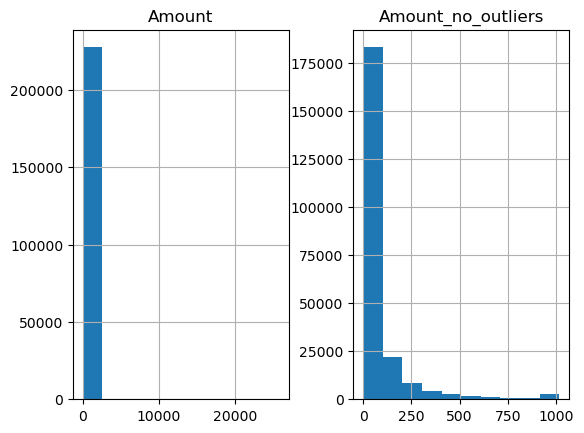

In [41]:
X_train[["Amount", "Amount_no_outliers"]].hist()

### Since everything indicates that columns V1-28 have as many values as there are customers (or credit cards), it is necessary to consider adding a column indicating whether fraud has already occurred with the given V1-28 values, as it's possible that subsequent transactions of the same customer may also be fraudulent.

In [42]:
raw_df.groupby('V1').agg({'Class': 'sum'}).sort_values('Class', ascending=False).head(15)

,Class
V1,
-13.192671,6
-26.457745,4
-13.086519,2
-7.030308,2
1.261324,2
-1.927453,2
-12.833631,2
-10.850282,2
-5.839192,2


In [43]:
raw_df.loc[raw_df['V1'].round(6) == -13.192671]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10297,68207.0,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.0,1
132070,68207.0,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.0,1
134522,68207.0,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.0,1
158919,68207.0,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.0,1
212652,68207.0,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.0,1
229950,68207.0,-13.192671,12.785971,-9.90665,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.39154,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.0,1


In [44]:
raw_df.loc[raw_df['V1'].round(6) == -26.457745]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32787,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.0,1
72221,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.0,1
88084,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.0,1
253865,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.8926,-1.227904,-31.197329,-11.43892,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.0,1


In [45]:
raw_df.loc[raw_df['V1'].round(6) == -13.086519	]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7448,93879.0,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.4983,-0.711066,30.31,1
250891,93879.0,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.4983,-0.711066,30.31,1


### Based on the above, we can infer that if a given customer (or credit card) has already had fraud assigned, the subsequent ones will be fraudulent as well.

### First and foremost, it should be noted that consecutive fraudulent transactions by the same customer are made in the same second.

### So introducing a column with information on whether a given customer had already been assigned fraud  can lead to overfitting of the model since it would mostly rely on the 'Class' column, and the model wouldn't be able to detect other unauthorized transactions within the same second.

# Checking the correlation between features and fraud

<Axes: >

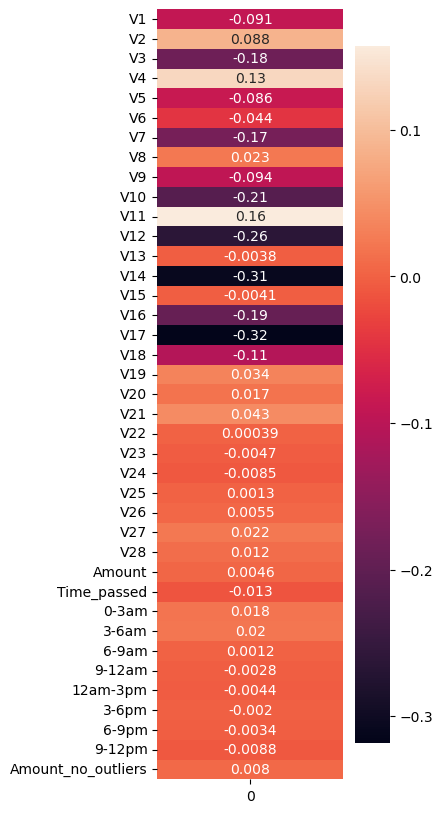

In [46]:
plt.figure(figsize=(3,10))
sns.heatmap(pd.DataFrame(pd.DataFrame.corrwith(X_train, y_train, numeric_only = True)), annot=True)

In [47]:
pd.DataFrame(pd.DataFrame.corrwith(X_train, y_train, numeric_only = True),
             columns=["Fraud_correlation"]).sort_values('Fraud_correlation').round(2).head(12)

,Fraud_correlation
V17,-0.32
V14,-0.31
V12,-0.26
V10,-0.21
V16,-0.19
V3,-0.18
V7,-0.17
V18,-0.11
V9,-0.09
V1,-0.09


In [48]:
pd.DataFrame(pd.DataFrame.corrwith(X_train, y_train, numeric_only = True),
             columns=["Fraud_correlation"]).sort_values('Fraud_correlation', ascending=False).round(2).head(4)

,Fraud_correlation
V11,0.16
V4,0.13
V2,0.09
V21,0.04


In [49]:
pd.DataFrame(pd.DataFrame.corrwith(X_train, y_train, numeric_only = True).abs(),
             columns=["Fraud_correlation_absolute"]).sort_values('Fraud_correlation_absolute', ascending=False).round(2)

,Fraud_correlation_absolute
V17,0.32
V14,0.31
V12,0.26
V10,0.21
V16,0.19
V3,0.18
V7,0.17
V11,0.16
V4,0.13
V18,0.11


# Dropping features that have a correlation with fraud less than 0.05
## and checking mutual features correlations.

In [50]:
pd.DataFrame(pd.DataFrame.corrwith(X_train, y_train, numeric_only = True).abs(),
             columns=["Fraud_correlation_absolute >= 0.05"]) >= 0.05

,Fraud_correlation_absolute >= 0.05
V1,True
V2,True
V3,True
V4,True
V5,True
V6,False
V7,True
V8,False
V9,True
V10,True


In [51]:
X_train = X_train.drop('Time', axis=1)

In [52]:
cols_to_drop = [col for col in X_train
                if abs(X_train[col].corr(y_train)) < 0.05]
cols_to_drop

['V6',
 'V8',
 'V13',
 'V15',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_passed',
 '0-3am',
 '3-6am',
 '6-9am',
 '9-12am',
 '12am-3pm',
 '3-6pm',
 '6-9pm',
 '9-12pm',
 'Amount_no_outliers']

In [53]:
X_train = X_train.drop(cols_to_drop, axis=1)
X_train

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18
136371,1.147453,0.169921,0.107944,0.428241,-0.081716,0.252880,-0.427275,0.068270,1.849592,0.985068,0.774749,-0.113567,-0.132744,-0.865116
214650,0.905219,-0.628453,0.425105,0.263475,-0.083835,-0.587172,2.214416,-0.930413,1.003671,-2.268323,1.576104,-1.594751,2.194734,-2.226157
274157,-0.952457,1.484818,1.480450,0.089976,0.381702,1.400403,0.881542,1.707870,0.184640,-0.646162,-1.436449,-0.321551,-0.213149,-0.173121
101787,-6.168734,5.308461,-4.764475,-0.734801,-3.494095,-2.758955,0.350296,0.716549,-2.195543,1.926296,2.607860,0.954083,1.242983,-0.541608
58997,-0.942352,1.075937,0.644943,-0.729171,1.409192,1.137491,-0.684114,-1.287391,-0.615632,0.112652,-1.158167,0.244752,0.385277,-0.241573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,-1.414193,1.524791,0.195142,-0.697015,0.690879,0.710302,-0.422639,-1.150292,-0.892371,-0.597268,-0.551661,0.370679,0.719382,-0.062171
221829,1.475440,-1.582568,-2.897057,-0.300239,0.092280,0.982769,-1.548156,1.010634,0.790592,0.707078,0.868639,-2.050031,-0.082927,1.136723
235965,1.905361,-1.025927,-1.395418,-0.181311,-0.794454,-0.075348,-0.305879,0.779041,-1.063725,-0.439499,0.505102,-1.628499,-0.208987,1.450960
129057,-0.189362,0.874036,0.160756,-0.579112,0.891944,1.251081,0.311946,-1.394940,-0.377711,0.272565,-2.142249,-0.095994,0.964710,-0.008964


<Axes: >

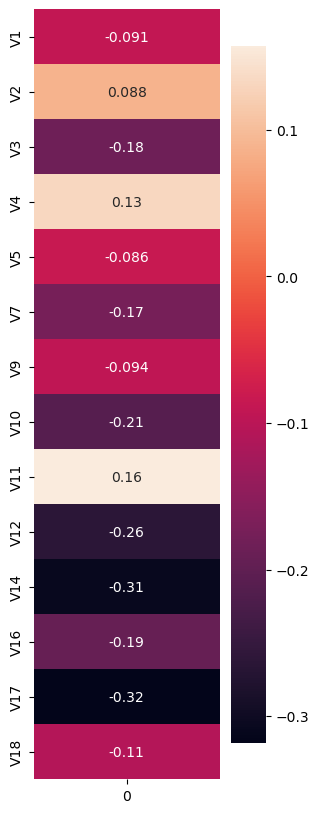

In [54]:
plt.figure(figsize=(3,10))
sns.heatmap(pd.DataFrame(pd.DataFrame.corrwith(X_train, y_train)), annot=True)

In [55]:
pd.DataFrame(pd.DataFrame.corrwith(X_train, y_train, numeric_only = True).abs(),
             columns=["Fraud_correlation_absolute"]).sort_values('Fraud_correlation_absolute', ascending=False).round(2)

,Fraud_correlation_absolute
V17,0.32
V14,0.31
V12,0.26
V10,0.21
V16,0.19
V3,0.18
V7,0.17
V11,0.16
V4,0.13
V18,0.11


<Axes: >

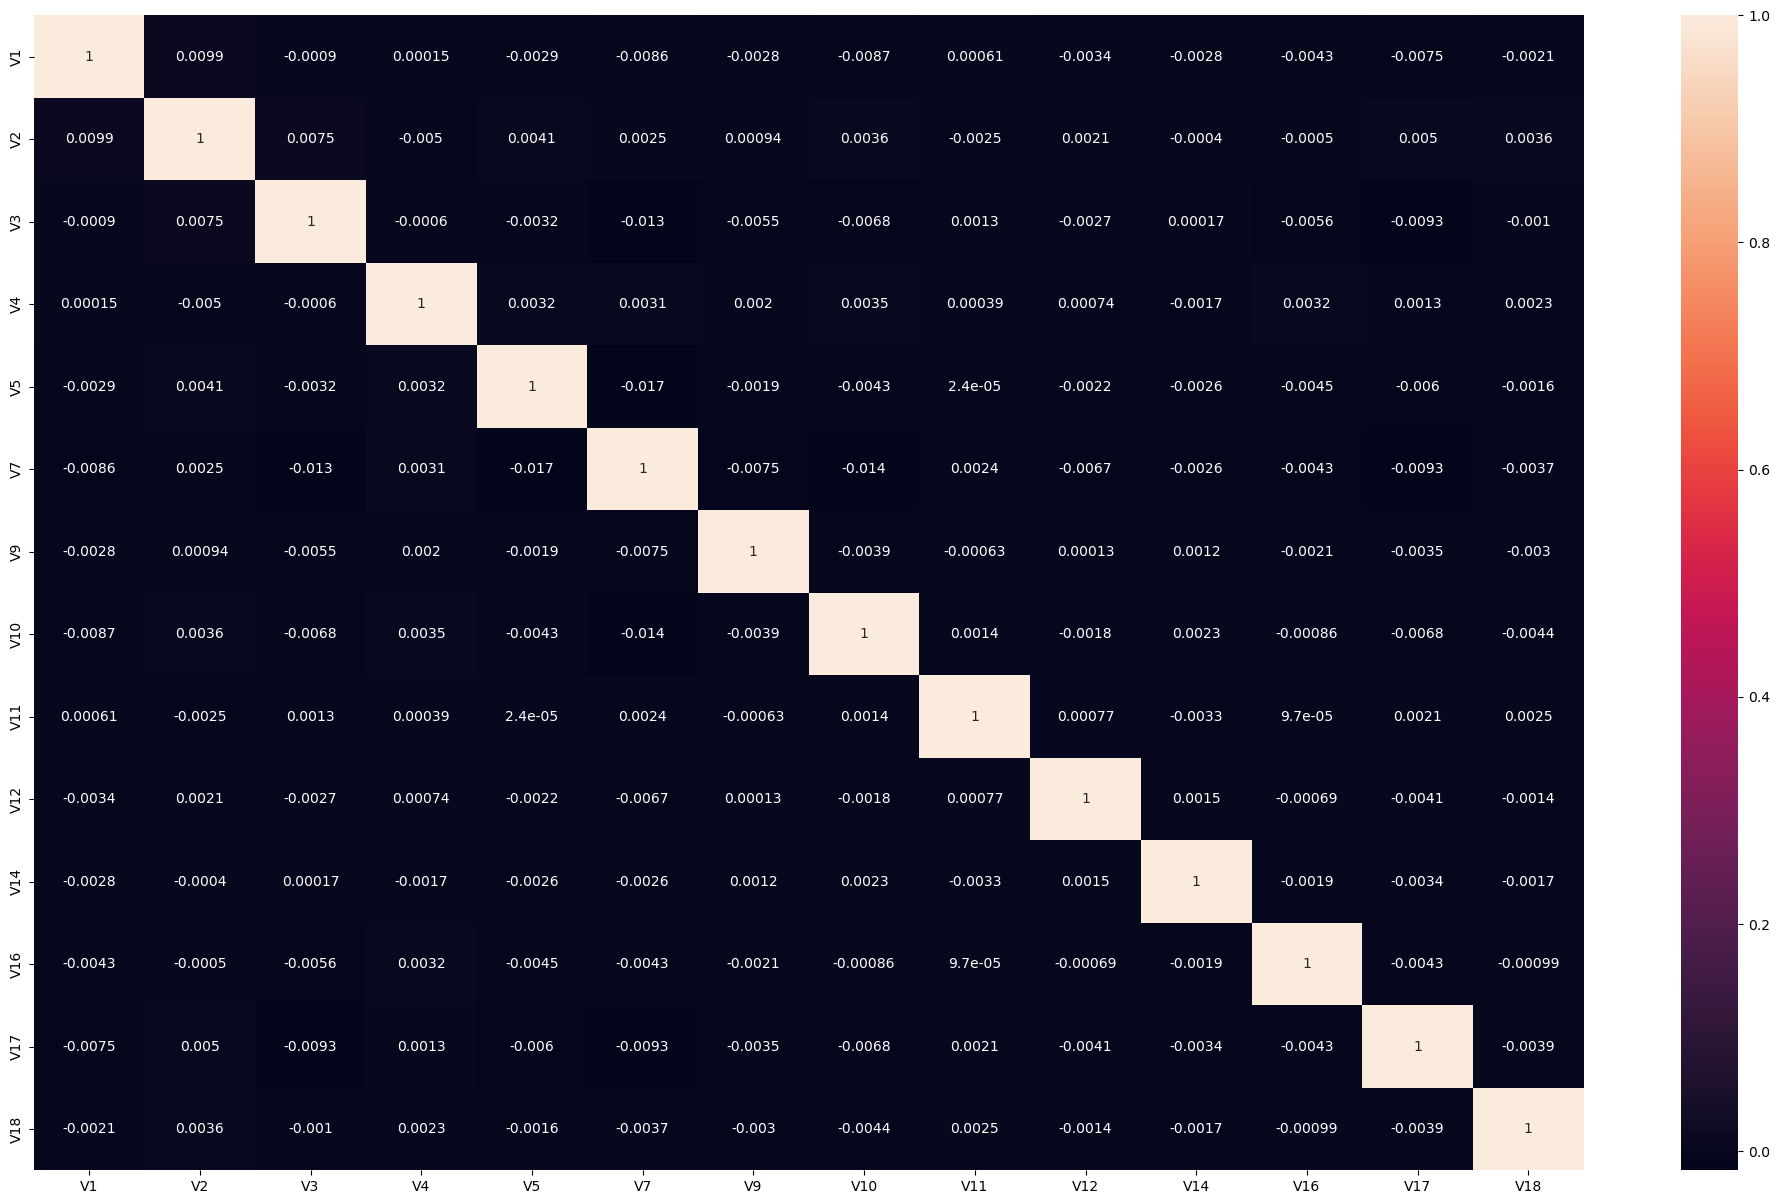

In [56]:
plt.figure(figsize=(25,15))
sns.heatmap(X_train.corr(), annot=True)

In [57]:
X_train.columns.tolist()

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18']

In [58]:
X_test.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [59]:
cols_to_drop_test = [x for x in X_test.columns.tolist() if x not in X_train.columns.tolist()]
cols_to_drop_test

['Time',
 'V6',
 'V8',
 'V13',
 'V15',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [60]:
X_test = X_test.drop(cols_to_drop_test, axis=1)
X_test

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18
24683,-1.593332,0.093556,0.630891,-0.821696,1.113369,1.076003,0.016231,-0.453481,-0.901905,0.032124,-0.047568,0.010262,-0.597410,-0.881910
124188,1.753215,-1.046138,-0.758575,0.557024,1.171107,-1.856526,1.825159,-0.054156,-0.762514,0.640857,-0.690942,0.119091,-0.480392,0.251364
214197,-0.841759,-0.004213,-0.316152,0.754097,2.394233,0.214540,-1.291829,0.476688,1.514284,0.279224,1.204408,-2.176008,1.301015,-1.025201
64832,1.192194,-0.461654,0.015102,0.317217,1.297562,-1.448439,1.223291,-0.249366,-0.880295,0.439799,-0.597709,0.167578,-0.517588,0.418628
116154,-1.336379,0.803282,0.728648,-0.817892,0.623442,0.337488,-0.594307,-0.771539,-0.085852,0.249406,0.545132,0.558497,-0.713371,0.608546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260448,1.225191,-0.464575,0.278467,0.543971,-0.521320,-0.500104,-0.855180,0.874437,0.475612,0.303266,0.284213,-1.888486,0.204919,1.088952
154392,-0.394635,-0.276334,0.132364,-1.401117,0.340532,0.328506,-1.021637,0.508268,-1.531103,-1.186075,0.399767,-1.364265,-0.344706,1.481828
160598,2.095311,-0.070879,-2.114115,0.105000,0.735413,-0.080387,0.618010,-0.145928,-0.057621,-0.595165,-0.282299,0.881987,0.007188,0.749195
134531,1.239323,0.545896,0.169513,2.098566,0.667948,0.033270,-0.678473,0.622075,-1.474722,-0.301865,0.186275,0.879616,-0.891616,-0.492455


In [61]:
X_train.columns.tolist() == X_test.columns.tolist()

True

# Training and validating the models.

In [62]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
]

pipeline_LogReg = Pipeline(steps=steps)
pipeline_LogReg.fit(X_train, y_train)

time_pipeline_LogReg = round(time.time() - start_time, 2)

preds = pipeline_LogReg.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_LogReg = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_LogReg]
                                ]

metrics_pipeline_LogReg = pd.DataFrame(metrics_pipeline_LogReg,
                                            columns=('', 'LogReg')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train.columns,
             "importance": (np.abs(pipeline_LogReg.named_steps['model'].coef_[0])
                                    * 100 / sum(np.abs(pipeline_LogReg.named_steps['model'].coef_[0]))).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_LogReg)
display(feature_importances)

,LogReg
,
Accuracy,0.9992
Precision,0.6633
Recall,0.8553
F1,0.7471
Time,0.4400


,importance
feature,
V4,18.0
V14,17.1
V3,13.1
V5,9.3
V16,8.9
V2,8.6
V18,6.7
V10,4.3
V7,3.9


In [63]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier())
]

pipeline_Tree = Pipeline(steps=steps)
pipeline_Tree.fit(X_train, y_train)

time_pipeline_Tree = round(time.time() - start_time, 2)

preds = pipeline_Tree.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Tree = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Tree]
                                ]

metrics_pipeline_Tree = pd.DataFrame(metrics_pipeline_Tree,
                                            columns=('', 'Tree')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train.columns,
             "importance": (pipeline_Tree.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Tree)
display(feature_importances)

,Tree
,
Accuracy,0.9990
Precision,0.7347
Recall,0.7059
F1,0.7200
Time,5.2800


,importance
feature,
V18,51.5
V9,12.5
V3,7.8
V4,6.0
V10,5.0
V14,3.4
V11,2.5
V12,2.4
V17,2.3


In [64]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', RandomForestClassifier())
]

pipeline_Forest = Pipeline(steps=steps)
pipeline_Forest.fit(X_train, y_train)

time_pipeline_Forest = round(time.time() - start_time, 2)

preds = pipeline_Forest.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Forest = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Forest]
                                ]

metrics_pipeline_Forest = pd.DataFrame(metrics_pipeline_Forest,
                                            columns=('', 'Forest')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train.columns,
             "importance": (pipeline_Forest.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Forest)
display(feature_importances)

,Forest
,
Accuracy,0.9995
Precision,0.7551
Recall,0.9136
F1,0.8268
Time,105.1200


,importance
feature,
V18,20.8
V2,18.0
V4,13.4
V9,8.5
V10,7.5
V3,5.9
V7,4.0
V16,3.8
V14,3.4


In [65]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', XGBClassifier())
]

pipeline_XGB = Pipeline(steps=steps)
pipeline_XGB.fit(X_train, y_train)

time_pipeline_XGB = round(time.time() - start_time, 2)

preds = pipeline_XGB.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_XGB = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_XGB]
                                ]

metrics_pipeline_XGB = pd.DataFrame(metrics_pipeline_XGB,
                                            columns=('', 'XGB')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train.columns,
             "importance": (pipeline_XGB.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_XGB)
display(feature_importances)

,XGB
,
Accuracy,0.9994
Precision,0.7449
Recall,0.9125
F1,0.8202
Time,40.2100


,importance
feature,
V18,36.299999
V4,11.700000
V9,10.600000
V3,6.100000
V10,5.200000
V2,4.400000
V1,4.000000
V14,4.000000
V5,3.500000


# Applying SMOTE oversampling to the training sets, and then training and validating the models.

In [66]:
sm = SMOTE(sampling_strategy='minority', random_state=123)

In [67]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [68]:
X_train_sm.shape, y_train_sm.shape

((454902, 14), (454902,))

In [69]:
y_train_sm.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [70]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
]

pipeline_LogReg_sm = Pipeline(steps=steps)
pipeline_LogReg_sm.fit(X_train_sm, y_train_sm)

time_pipeline_LogReg_sm = round(time.time() - start_time, 2)

preds = pipeline_LogReg_sm.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_LogReg_sm = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_LogReg_sm]
                                ]

metrics_pipeline_LogReg_sm = pd.DataFrame(metrics_pipeline_LogReg_sm,
                                            columns=('', 'LogReg_sm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_sm.columns,
             "importance": (np.abs(pipeline_LogReg_sm.named_steps['model'].coef_[0])
                                    * 100 / sum(np.abs(pipeline_LogReg_sm.named_steps['model'].coef_[0]))).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_LogReg_sm)
display(feature_importances)

,LogReg_sm
,
Accuracy,0.9696
Precision,0.9184
Recall,0.0496
F1,0.0940
Time,1.0400


,importance
feature,
V2,24.1
V1,19.2
V11,13.2
V3,9.8
V17,6.1
V12,4.7
V16,4.6
V5,4.4
V18,4.4


In [71]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier())
]

pipeline_Tree_sm = Pipeline(steps=steps)
pipeline_Tree_sm.fit(X_train_sm, y_train_sm)

time_pipeline_Tree_sm = round(time.time() - start_time, 2)

preds = pipeline_Tree_sm.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Tree_sm = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Tree_sm]
                                ]

metrics_pipeline_Tree_sm = pd.DataFrame(metrics_pipeline_Tree_sm,
                                            columns=('', 'Tree_sm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_sm.columns,
             "importance": (pipeline_Tree_sm.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Tree_sm)
display(feature_importances)

,Tree_sm
,
Accuracy,0.9969
Precision,0.7959
Recall,0.3319
F1,0.4685
Time,10.3500


,importance
feature,
V1,68.9
V3,9.1
V2,3.8
V5,3.4
V12,2.6
V18,2.2
V17,1.6
V16,1.5
V4,1.3


In [72]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', RandomForestClassifier())
]

pipeline_Forest_sm = Pipeline(steps=steps)
pipeline_Forest_sm.fit(X_train_sm, y_train_sm)

time_pipeline_Forest_sm = round(time.time() - start_time, 2)

preds = pipeline_Forest_sm.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Forest_sm = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Forest_sm]
                                ]

metrics_pipeline_Forest_sm = pd.DataFrame(metrics_pipeline_Forest_sm,
                                            columns=('', 'Forest_sm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_sm.columns,
             "importance": (pipeline_Forest_sm.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Forest_sm)
display(feature_importances)

,Forest_sm
,
Accuracy,0.9993
Precision,0.8163
Recall,0.7767
F1,0.7960
Time,194.5700


,importance
feature,
V1,40.1
V2,26.5
V3,9.3
V5,2.9
V17,2.9
V12,2.8
V4,2.3
V18,2.1
V10,2.0


In [73]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', XGBClassifier())
]

pipeline_XGB_sm = Pipeline(steps=steps)
pipeline_XGB_sm.fit(X_train_sm, y_train_sm)

time_pipeline_XGB_sm = round(time.time() - start_time, 2)

preds = pipeline_XGB_sm.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_XGB_sm = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_XGB_sm]
                                ]

metrics_pipeline_XGB_sm = pd.DataFrame(metrics_pipeline_XGB_sm,
                                            columns=('', 'XGB_sm')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_sm.columns,
             "importance": (pipeline_XGB_sm.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_XGB_sm)
display(feature_importances)

,XGB_sm
,
Accuracy,0.9982
Precision,0.8367
Recall,0.4910
F1,0.6189
Time,112.0000


,importance
feature,
V1,57.099998
V3,10.200000
V2,4.700000
V5,4.200000
V18,3.800000
V12,2.900000
V7,2.800000
V14,2.500000
V10,2.300000


# Applying Smote TOMEK undersampling to the training sets, and then training and validating the models.

In [74]:
smt = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=123)

In [75]:
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)

In [76]:
X_train_smt.shape, y_train_smt.shape

((454902, 14), (454902,))

In [77]:
y_train_smt.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [78]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
]

pipeline_LogReg_smt = Pipeline(steps=steps)
pipeline_LogReg_smt.fit(X_train_smt, y_train_smt)

time_pipeline_LogReg_smt = round(time.time() - start_time, 2)

preds = pipeline_LogReg_smt.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_LogReg_smt = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_LogReg_smt]
                                ]

metrics_pipeline_LogReg_smt = pd.DataFrame(metrics_pipeline_LogReg_smt,
                                            columns=('', 'LogReg_smt')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_smt.columns,
             "importance": (np.abs(pipeline_LogReg_smt.named_steps['model'].coef_[0])
                                    * 100 / sum(np.abs(pipeline_LogReg_smt.named_steps['model'].coef_[0]))).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_LogReg_smt)
display(feature_importances)

,LogReg_smt
,
Accuracy,0.9696
Precision,0.9184
Recall,0.0496
F1,0.0940
Time,1.0600


,importance
feature,
V2,24.1
V1,19.2
V11,13.2
V3,9.8
V17,6.1
V12,4.7
V16,4.6
V5,4.4
V18,4.4


In [79]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier())
]

pipeline_Tree_smt = Pipeline(steps=steps)
pipeline_Tree_smt.fit(X_train_smt, y_train_smt)

time_pipeline_Tree_smt = round(time.time() - start_time, 2)

preds = pipeline_Tree_smt.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Tree_smt = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Tree_smt]
                                ]

metrics_pipeline_Tree_smt = pd.DataFrame(metrics_pipeline_Tree_smt,
                                            columns=('', 'Tree_smt')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_smt.columns,
             "importance": (pipeline_Tree_smt.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Tree_smt)
display(feature_importances)

,Tree_smt
,
Accuracy,0.9970
Precision,0.8163
Recall,0.3448
F1,0.4848
Time,10.8600


,importance
feature,
V1,68.9
V3,9.1
V2,3.9
V5,3.4
V12,2.6
V18,2.2
V17,1.6
V16,1.5
V4,1.3


In [80]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', RandomForestClassifier())
]

pipeline_Forest_smt = Pipeline(steps=steps)
pipeline_Forest_smt.fit(X_train_smt, y_train_smt)

time_pipeline_Forest_smt = round(time.time() - start_time, 2)

preds = pipeline_Forest_smt.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Forest_smt = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_Forest_smt]
                                ]

metrics_pipeline_Forest_smt = pd.DataFrame(metrics_pipeline_Forest_smt,
                                            columns=('', 'Forest_smt')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_smt.columns,
             "importance": (pipeline_Forest_smt.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_Forest_smt)
display(feature_importances)

,Forest_smt
,
Accuracy,0.9993
Precision,0.8163
Recall,0.7843
F1,0.8000
Time,193.9100


,importance
feature,
V1,38.5
V2,27.9
V3,10.9
V12,2.8
V5,2.7
V17,2.6
V4,2.2
V18,2.0
V11,1.9


In [81]:
start_time = time.time()

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', XGBClassifier())
]

pipeline_XGB_smt = Pipeline(steps=steps)
pipeline_XGB_smt.fit(X_train_smt, y_train_smt)

time_pipeline_XGB_smt = round(time.time() - start_time, 2)

preds = pipeline_XGB_smt.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_XGB_smt = [[name, round(metric(preds, y_test),4)]
                                for metric, name in zip(metrics, metrics_name)] + [
                                ['Time', time_pipeline_XGB_smt]
                                ]

metrics_pipeline_XGB_smt = pd.DataFrame(metrics_pipeline_XGB_smt,
                                            columns=('', 'XGB_smt')).set_index('', inplace=False)

feature_importances = pd.DataFrame({"feature": X_train_sm.columns,
             "importance": (pipeline_XGB_smt.named_steps['model'].feature_importances_ * 100).round(1),
             }
            ).sort_values("importance", ascending=False)

feature_importances.set_index('feature', inplace=True)

display(metrics_pipeline_XGB_smt)
display(feature_importances)

,XGB_smt
,
Accuracy,0.9982
Precision,0.8367
Recall,0.4910
F1,0.6189
Time,113.3600


,importance
feature,
V1,57.099998
V3,10.200000
V2,4.700000
V5,4.200000
V18,3.800000
V12,2.900000
V7,2.800000
V14,2.500000
V10,2.300000


# Summary of model performances.

In [82]:
pipelines_metrics = pd.concat([metrics_pipeline_LogReg,
                               metrics_pipeline_Tree,
                               metrics_pipeline_Forest,
                               metrics_pipeline_XGB,
                              ], axis=1)

pipelines_sm_metrics = pd.concat([metrics_pipeline_LogReg_sm,
                               metrics_pipeline_Tree_sm,
                               metrics_pipeline_Forest_sm,
                               metrics_pipeline_XGB_sm
                              ], axis=1)

pipelines_smt_metrics = pd.concat([metrics_pipeline_LogReg_smt,
                               metrics_pipeline_Tree_smt,
                               metrics_pipeline_Forest_smt,
                               metrics_pipeline_XGB_smt
                              ], axis=1)

display(pipelines_metrics)
display(pipelines_sm_metrics)
display(pipelines_smt_metrics)

,LogReg,Tree,Forest,XGB
,,,,
Accuracy,0.9992,0.9990,0.9995,0.9994
Precision,0.6633,0.7347,0.7551,0.7449
Recall,0.8553,0.7059,0.9136,0.9125
F1,0.7471,0.7200,0.8268,0.8202
Time,0.4400,5.2800,105.1200,40.2100


,LogReg_sm,Tree_sm,Forest_sm,XGB_sm
,,,,
Accuracy,0.9696,0.9969,0.9993,0.9982
Precision,0.9184,0.7959,0.8163,0.8367
Recall,0.0496,0.3319,0.7767,0.4910
F1,0.0940,0.4685,0.7960,0.6189
Time,1.0400,10.3500,194.5700,112.0000


,LogReg_smt,Tree_smt,Forest_smt,XGB_smt
,,,,
Accuracy,0.9696,0.9970,0.9993,0.9982
Precision,0.9184,0.8163,0.8163,0.8367
Recall,0.0496,0.3448,0.7843,0.4910
F1,0.0940,0.4848,0.8000,0.6189
Time,1.0600,10.8600,193.9100,113.3600


## Scores meaning:
- Accuracy (accuracy_score) - 'computes subset accuracy'
- Precision (precision_score) - 'the ability of the classifier not to label as positive a sample that is negative'
- Recall (recall_score) - 'the ability of the classifier to find all the positive samples'
- F1 (f1_score) - 'harmonic mean of the precision and recall'

## Conclusions:
- The accuracy score is useless in highly imbalanced data. Even if the model predicts that all transactions are non-fraud, it will still have an accuracy score of 99.83% because that's the proportion of such transactions in the dataset.
- The recall score tells us how accurate the classifier is in detecting fraud, which is the most important aspect.
- The precision score tells us how precise the classifier is in identifying non-fraud transactions. It is also important because the bank cannot afford to deal with too many false positives.
- The best models seem to be the RandomForestClassifier and XGBClassifier fitted on non-oversampled/undersampled data.

## Grid Search for Pipeline "LogReg"

In [83]:
pipeline_LogReg

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('model', LogisticRegression())])

In [84]:
pipeline_LogReg.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('pca', PCA()),
  ('model', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'pca': PCA(),
 'model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [94]:
start_time = time.time()

param_grid = dict(scaler = [None, StandardScaler(), MinMaxScaler(), PowerTransformer()],
                  pca = [None, PCA()],
                  model__C = [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  model__penalty = ['l1', 'l2'],
                  model__max_iter = [1000]
                 )

grid_search = GridSearchCV(pipeline_LogReg, param_grid, scoring="f1", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f' Execution time: {round((time.time() - start_time)/60, 2)} minute(s)')

 Execution time: 2.56 minute(s)


In [95]:
LogReg_best_params = pd.DataFrame.from_dict(grid_search.best_params_,
                                                 orient='index',
                                                 columns=['LogReg_best_params'])

preds = grid_search.best_estimator_.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_LogReg_best_params = [[name, round(metric(preds, y_test),4)]
                                            for metric, name in zip(metrics, metrics_name)]

metrics_pipeline_LogReg_best_params = pd.DataFrame(metrics_pipeline_LogReg_best_params,
                                            columns=('', 'LogReg_best_params')).set_index('', inplace=False)

In [96]:
metrics_before_after_GridSearchCV = pd.concat([metrics_pipeline_LogReg.drop('Time'),
                                               metrics_pipeline_LogReg_best_params
                                              ], axis=1)

display(LogReg_best_params)
display(metrics_before_after_GridSearchCV)

,LogReg_best_params
model__C,1
model__max_iter,1000
model__penalty,l2
pca,None
scaler,PowerTransformer()


,LogReg,LogReg_best_params
,,
Accuracy,0.9992,0.9992
Precision,0.6633,0.6633
Recall,0.8553,0.8553
F1,0.7471,0.7471


## Grid Search for Pipeline "Forest"

In [88]:
pipeline_Forest

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('model', RandomForestClassifier())])

In [89]:
pipeline_Forest.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('pca', PCA()),
  ('model', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'pca': PCA(),
 'model': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'mo

In [115]:
start_time = time.time()

param_grid = dict(scaler = [None, StandardScaler(), MinMaxScaler(), PowerTransformer()],
                  pca = [None, PCA()],
#                   model__max_depth = [None, 10],
                  model__n_estimators = [100, 200, 300],
#                   model__min_samples_split 0= [2, 3],
#                   model__min_samples_leaf = [1, 2],
#                   model__max_leaf_nodes = [None, 10]
                 )

grid_search = GridSearchCV(pipeline_Forest, param_grid, scoring="recall", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f' Execution time: {round((time.time() - start_time)/60, 2)} minute(s)')

 Execution time: 68.62 minute(s)


In [116]:
Forest_best_params = pd.DataFrame.from_dict(grid_search.best_params_,
                                                 orient='index',
                                                 columns=['Forest_best_params'])

preds = grid_search.best_estimator_.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_Forest_best_params = [[name, round(metric(preds, y_test),4)]
                                            for metric, name in zip(metrics, metrics_name)]

metrics_pipeline_Forest_best_params = pd.DataFrame(metrics_pipeline_Forest_best_params,
                                            columns=('', 'Forest_best_params')).set_index('', inplace=False)

In [117]:
metrics_before_after_GridSearchCV = pd.concat([metrics_pipeline_Forest.drop('Time'),
                                               metrics_pipeline_Forest_best_params
                                              ], axis=1)

display(Forest_best_params)
display(metrics_before_after_GridSearchCV)

,Forest_best_params
model__n_estimators,300.0
pca,NaN
scaler,NaN


,Forest,Forest_best_params
,,
Accuracy,0.9995,0.9995
Precision,0.7551,0.7755
Recall,0.9136,0.9268
F1,0.8268,0.8444


## Grid Search for Pipeline "XGB"

In [97]:
pipeline_XGB

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [98]:
pipeline_XGB.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('pca', PCA()),
  ('model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 predictor=None, random_state=None, ...))],
 'verbose': False,
 'scaler': StandardScaler(),
 'pca': PCA(),
 'model': XGBClassifier(base_score=None, booster=None, callba

In [112]:
start_time = time.time()

param_grid = dict(scaler = [None, StandardScaler(), MinMaxScaler(), PowerTransformer()],
                  pca = [None, PCA()],
                  model__max_depth = [6, 10, 20],
#                   model__max_leaves = [None, 10],
#                   model__max_bin = [None, 512],
#                   model__learning_rate = [0.3, 0.4] ,
#                   model__min_child_weight = [1, 3],
#                   model__colsample_bytree = [None, 0.5],
#                   model__gamma = [None, 0.3]
                 )

grid_search = GridSearchCV(pipeline_XGB, param_grid, scoring="recall", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f' Execution time: {round((time.time() - start_time)/60, 2)} minute(s)')

 Execution time: 20.08 minute(s)


In [113]:
XGB_best_params = pd.DataFrame.from_dict(grid_search.best_params_,
                                                 orient='index',
                                                 columns=['XGB_best_params'])

preds = grid_search.best_estimator_.predict(X_test)
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

metrics_pipeline_XGB_best_params = [[name, round(metric(preds, y_test),4)]
                                            for metric, name in zip(metrics, metrics_name)]

metrics_pipeline_XGB_best_params = pd.DataFrame(metrics_pipeline_XGB_best_params,
                                            columns=('', 'XGB_best_params')).set_index('', inplace=False)

In [118]:
metrics_before_after_GridSearchCV = pd.concat([metrics_pipeline_Forest_best_params,
                                               metrics_pipeline_XGB.drop('Time'),
                                               metrics_pipeline_XGB_best_params
                                              ], axis=1)

display(XGB_best_params)
display(metrics_before_after_GridSearchCV)

,XGB_best_params
model__max_depth,6
pca,PCA()
scaler,PowerTransformer()


,Forest_best_params,XGB,XGB_best_params
,,,
Accuracy,0.9995,0.9994,0.9996
Precision,0.7755,0.7449,0.8163
Recall,0.9268,0.9125,0.9524
F1,0.8444,0.8202,0.8791


# Summary:
- All the goals stated at the beginning are accomplished.
- The best model (based on XGBClassifier fitted on non-oversampled/undersampled data) managed to detect 95,24 % of frauds (recall score) with an F1 score of 0.88.
- It was possible to improve this model by finding better parameters than the default.
- There is still a possibility to further improve the best model, but considering the time required so far, significantly  more computing power is needed (starting with GridSearchCV parameter cv=10, which could yield interesting results).